### Lab Linear Regression

#### Boston simple regression

In [1]:
# data
import numpy as np
import pandas as pd

# stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression

# viz
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

# ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [2]:
df = load_data("Boston")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [3]:
X = pd.DataFrame({
    "const": np.ones(df.shape[0]),
    "lstat": df["lstat"]
})
y = df["medv"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           5.08e-88
Time:                        17:23:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [4]:
model.params

const    34.553841
lstat    -0.950049
dtype: float64

In [5]:
# realizando predições
X_new = pd.DataFrame({"lstat": [5, 10, 15, 20]})
X_new = sm.add_constant(X_new)

y_pred = model.get_prediction(X_new)
y_pred.predicted_mean

array([29.80359411, 25.05334734, 20.30310057, 15.5528538 ])

In [6]:
# intervalos de confiança
y_pred.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299],
       [14.77355013, 16.33215748]])

In [7]:
# intervalos de predição
y_pred.conf_int(alpha=0.05, obs=True)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905],
       [ 3.31602098, 27.78968663]])

In [8]:
# função add line
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/tmp/ipykernel_5990/3633314762.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[0],
/tmp/ipykernel_5990/3633314762.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[1],


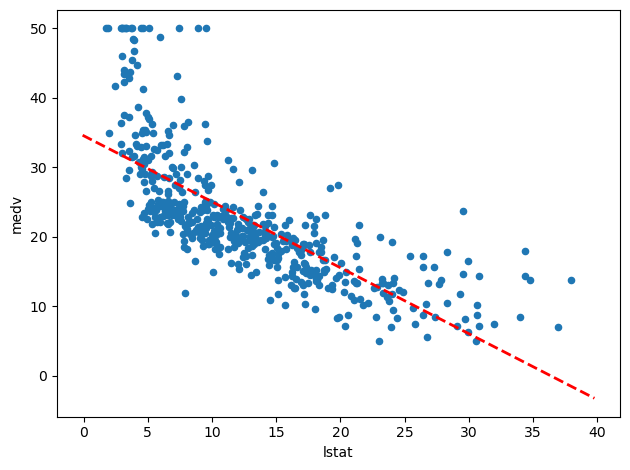

In [9]:
ax = df.plot.scatter("lstat", "medv")
abline(
    ax,
    model.params[0],
    model.params[1],
    "r--",
    linewidth=2
)

plt.tight_layout()
plt.show()

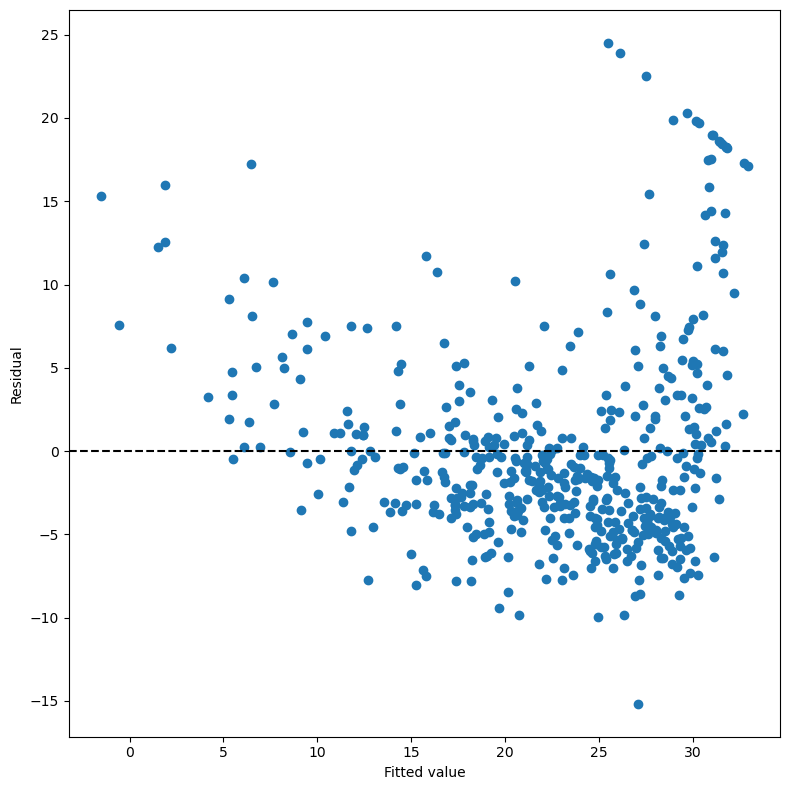

In [10]:
# plotando gráfico de resíduos
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls= '--')

plt.tight_layout()
plt.show()

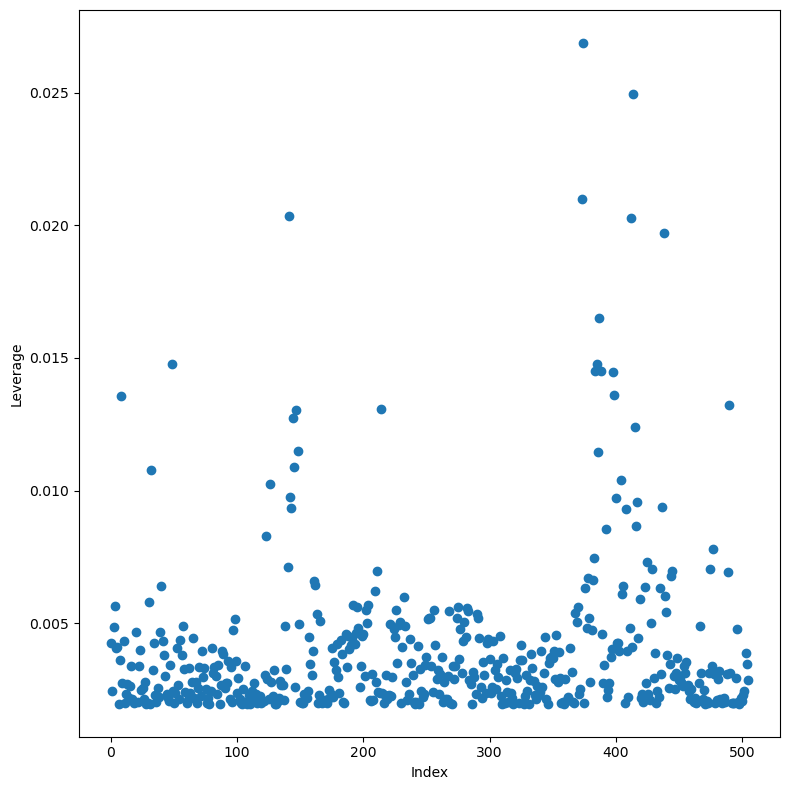

In [11]:
# Verificando pontos de alavanca
infl = model.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

plt.tight_layout()
plt.show()

In [12]:
# multi linear regression
X = MS(["lstat", 'age']).fit_transform(df)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           2.98e-88
Time:                        17:23:50   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.0

In [13]:
terms = df.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [14]:
X = MS(terms).fit_transform(df)
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          2.23e-133
Time:                        17:23:50   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.0

In [15]:
terms = df.columns.drop(["medv", "age"])
X = MS(terms).fit_transform(df)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          2.03e-134
Time:                        17:23:51   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.5251      4.920      8.441      0.0

In [16]:
# calculando VIF *List Comprehension
vals = [VIF(X, i) for i in range(1, X.shape[1])]

vif = pd.DataFrame({
    "vif": vals
}, index=X.columns[1:])
vif

,vif
crim,1.767455
zn,2.265259
indus,3.987176
chas,1.068018
nox,4.070020
rm,1.834792
dis,3.613722
rad,7.396707
tax,8.994939
ptratio,1.785403


Multicolinearidade média/alta para tax e rad

In [17]:
# Adicionando termos de interação (suposição de aditividade)
X = MS(["rm", "lstat", ("rm", "lstat")]).fit_transform(df)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.75e-146
Time:                        17:23:51   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -29.1245      3.342     -8.713      0.0

Esse modelo com apenas duas variáveis possui R2 maior do que o modelo acima com todas as preditoras presentes, ou seja, a interação entre features é extremamente importante.

In [18]:
# Modelos polinomiais
X = MS([poly("lstat", degree=2), poly("rm", degree=2)]).fit_transform(df)
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     377.7
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.09e-149
Time:                        17:23:51   Log-Likelihood:                -1488.5
No. Observations:                 506   AIC:                             2987.
Df Residuals:                     501   BIC:                             3008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [19]:
# teste anova para comparar os modelos
anova_lm(model, model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,11095.726194,0.0,NaN,NaN,NaN
1,501.0,10637.478818,1.0,458.247376,21.582364,0.000004
